<img src="logo_UTN.svg" align="right" width="150" /> 

## Teoría de Circuitos II

### Tarea Semanal 12

#### Por Matías Marfisi


# Ejercicio 1

## Desarrollo

![Consigna](Consigna1.png "Consigna")

![1](Desarrollo/1.jpeg "1")

![2](Desarrollo/2.jpeg "2")

## Simulacion

In [10]:
# Módulos para Jupyter

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
#%%  Inicialización de librerías
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del documento
mpl.rcParams['figure.figsize'] = (25,15)

#%% Esto tiene que ver con cuestiones de presentación de los gráficos,
# NO ES IMPORTANTE
fig_sz_x = 14
fig_sz_y = 13
fig_dpi = 80 # dpi

#fig_font_family = 'Ubuntu'
fig_font_size = 16

plt.rcParams.update({'font.size':fig_font_size})
#plt.rcParams.update({'font.family':fig_font_family})

# módulo de SciPy
from scipy import signal as sig

import sympy as sp
import splane as tc2
from schemdraw import Drawing
from schemdraw.elements import  Resistor, Capacitor, Inductor
import numpy as np
import ltspice

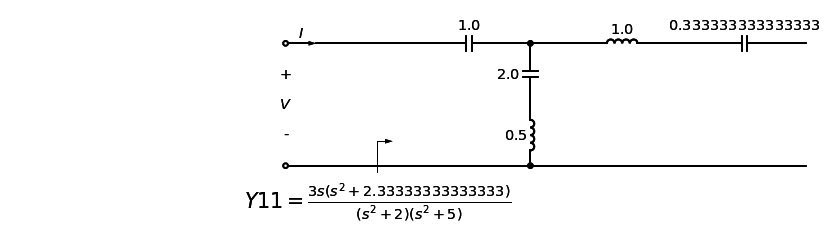

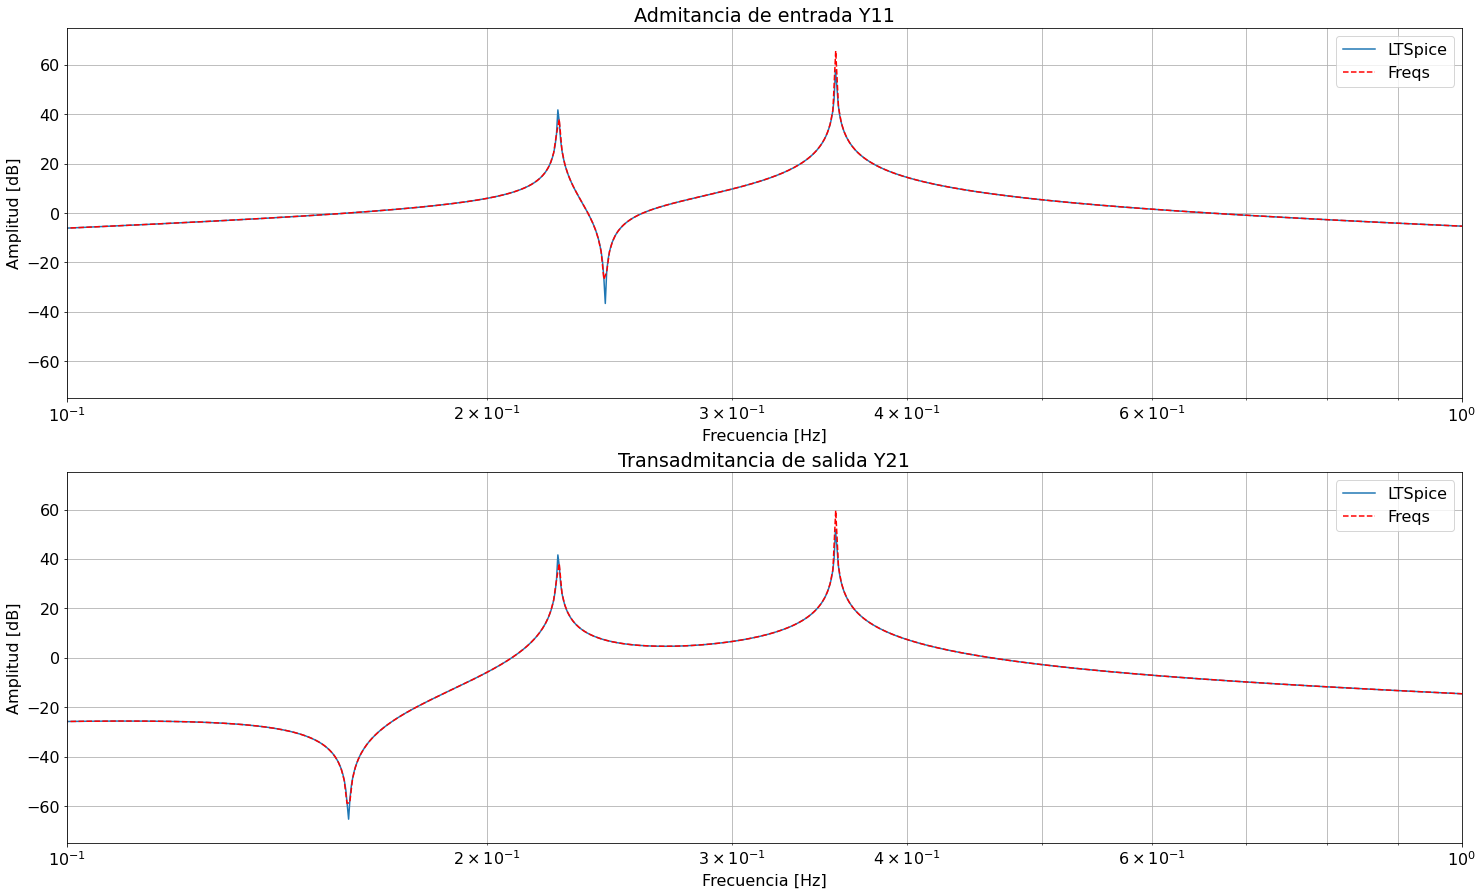

In [55]:
# Importo simulaciones de LTSpice
l = ltspice.Ltspice('Simulacion/EJ1.raw')
l.parse()

freq = l.get_frequency()
Y11 =l.get_data('I(V1)')
Y21 =l.get_data('I(L2)')

fig, ax = plt.subplots(2,1)
for i in range(2):
    ax[i].grid(visible='true', which='both', axis='both') 
    ax[i].legend(['LTSpice']) 
    ax[i].set_ylabel('Amplitud [dB]') 
    ax[i].set_xlabel('Frecuencia [Hz]') 
    ax[i].set_xlim([0.1, 1]) 
    ax[i].set_ylim([-75, 75])
    
ax[0].set_title('Admitancia de entrada Y11') 
ax[0].semilogx(freq, 20 * np.log10(abs(Y11)), label='LTSpice') 
ax[1].set_title('Transadmitancia de salida Y21') 
ax[1].semilogx(freq, 20 * np.log10(abs(Y21)), label='LTSpice') 

# Obtengo respuesta con freqs
num_Y11 = np.polymul([3, 0],[1, 0, 7/3])
den_Y11 = np.polymul([1, 0, 2],[1, 0, 5])

num_Y21 = np.polymul([1, 0],[1, 0, 1])
den_Y21 = np.polymul([1, 0, 2],[1, 0, 5])

w = np.logspace(-1, 1, 1000)

_, Y11_2 = sig.freqs(num_Y11, den_Y11, w)
_, Y21_2 = sig.freqs(num_Y21, den_Y21, w)

ax[0].semilogx(w / (2*np.pi), 20 * np.log10(abs(Y11_2)), 'r--', label='Freqs') 
ax[0].legend(['LTSpice', 'Freqs']) 
ax[1].semilogx(w / (2*np.pi), 20 * np.log10(abs(Y21_2)), 'r--', label='Freqs') 
ax[1].legend(['LTSpice', 'Freqs']) 

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Y11_s = 3*s*(s**2+7/3) / ( (s**2+2)*(s**2+5) )

Z11_s = 1 / Y11_s

# Remocion parcial en DC
Z2, Zc1 = tc2.remover_polo_dc(Z11_s, omega_zero = 1 )
C1 = 1 / (s*Zc1)
Y2 = 1/Z2

# Remocion polo en 1 para Y2
Y3, Yt2, L1, C2 = tc2.remover_polo_jw(Y2, isImpedance = False, omega = 1)
Z3 = 1/Y3

# Remocion polo en infinito para Z3
Z4, Zl2 = tc2.remover_polo_infinito(Z3)
L2 = Zl2 / s

# Remocion polo en DC para Z4
Z5, Zc3 = tc2.remover_polo_dc(Z4)
C3 = 1 / (s*Zc3)

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Y11',  
                                          Y11_s, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)
d = tc2.dibujar_elemento_serie(d, Capacitor, C1)
d = tc2.dibujar_tanque_derivacion(d, L1, C2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_serie(d, Inductor, L2)
d = tc2.dibujar_elemento_serie(d, Capacitor, C3)


display(d)

# Ejercicio 2

## Desarrollo

![Consigna](Consigna2.png "Consigna")

![3](Desarrollo/3.jpeg "3")

![4](Desarrollo/4.jpeg "4")

## Simulacion

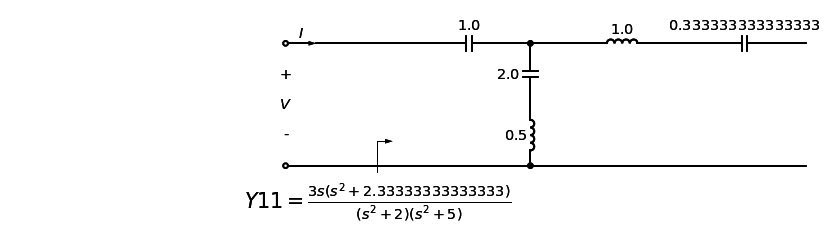

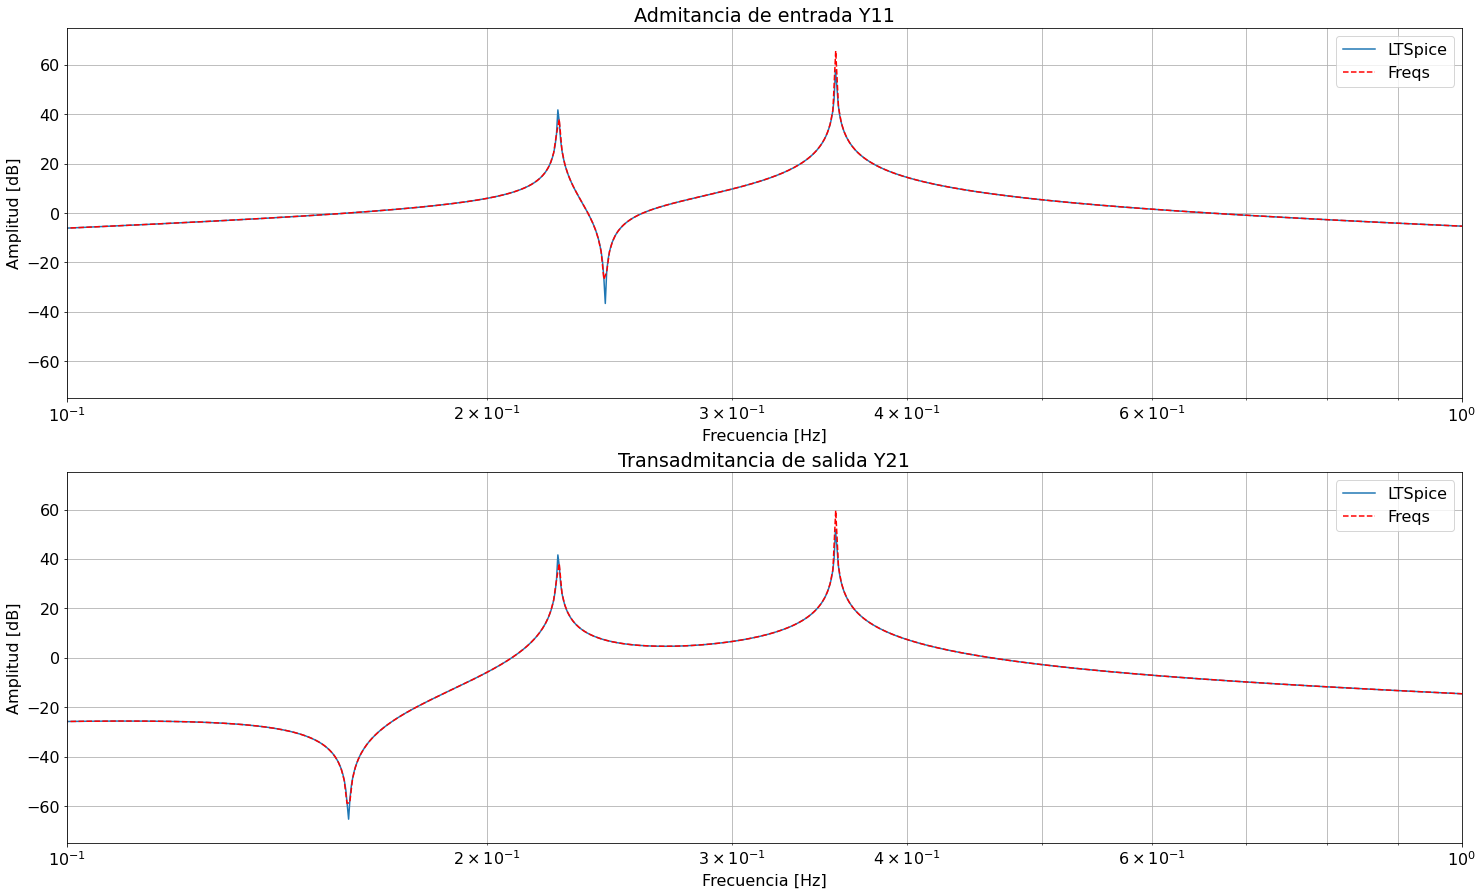

In [55]:
# Importo simulaciones de LTSpice
l = ltspice.Ltspice('Simulacion/EJ2.raw')
l.parse()

freq = l.get_frequency()
Y11 =l.get_data('I(V1)')
Y21 =l.get_data('I(L2)')

fig, ax = plt.subplots(2,1)
for i in range(2):
    ax[i].grid(visible='true', which='both', axis='both') 
    ax[i].legend(['LTSpice']) 
    ax[i].set_ylabel('Amplitud [dB]') 
    ax[i].set_xlabel('Frecuencia [Hz]') 
    ax[i].set_xlim([0.1, 1]) 
    ax[i].set_ylim([-75, 75])
    
ax[0].set_title('Admitancia de entrada Y11') 
ax[0].semilogx(freq, 20 * np.log10(abs(Y11)), label='LTSpice') 
ax[1].set_title('Transadmitancia de salida Y21') 
ax[1].semilogx(freq, 20 * np.log10(abs(Y21)), label='LTSpice') 

# Obtengo respuesta con freqs
num_Y11 = np.polymul([3, 0],[1, 0, 7/3])
den_Y11 = np.polymul([1, 0, 2],[1, 0, 5])

num_Y21 = np.polymul([1, 0],[1, 0, 1])
den_Y21 = np.polymul([1, 0, 2],[1, 0, 5])

w = np.logspace(-1, 1, 1000)

_, Y11_2 = sig.freqs(num_Y11, den_Y11, w)
_, Y21_2 = sig.freqs(num_Y21, den_Y21, w)

ax[0].semilogx(w / (2*np.pi), 20 * np.log10(abs(Y11_2)), 'r--', label='Freqs') 
ax[0].legend(['LTSpice', 'Freqs']) 
ax[1].semilogx(w / (2*np.pi), 20 * np.log10(abs(Y21_2)), 'r--', label='Freqs') 
ax[1].legend(['LTSpice', 'Freqs']) 

# Resolución simbólica
s = sp.symbols('s ', complex=True)

Y11_s = 3*s*(s**2+7/3) / ( (s**2+2)*(s**2+5) )

Z11_s = 1 / Y11_s

# Remocion parcial en DC
Z2, Zc1 = tc2.remover_polo_dc(Z11_s, omega_zero = 1 )
C1 = 1 / (s*Zc1)
Y2 = 1/Z2

# Remocion polo en 1 para Y2
Y3, Yt2, L1, C2 = tc2.remover_polo_jw(Y2, isImpedance = False, omega = 1)
Z3 = 1/Y3

# Remocion polo en infinito para Z3
Z4, Zl2 = tc2.remover_polo_infinito(Z3)
L2 = Zl2 / s

# Remocion polo en DC para Z4
Z5, Zc3 = tc2.remover_polo_dc(Z4)
C3 = 1 / (s*Zc3)

# Dibujamos la red resultante:
    
d = Drawing(unit=4)  # unit=2 makes elements have shorter than normal leads

d = tc2.dibujar_puerto_entrada(d,
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = tc2.dibujar_funcion_exc_abajo(d, 
                                          'Y11',  
                                          Y11_s, 
                                          hacia_salida = True,
                                          k_gap_width = 0.5)
d = tc2.dibujar_elemento_serie(d, Capacitor, C1)
d = tc2.dibujar_tanque_derivacion(d, L1, C2)
d = tc2.dibujar_espacio_derivacion(d)
d = tc2.dibujar_elemento_serie(d, Inductor, L2)
d = tc2.dibujar_elemento_serie(d, Capacitor, C3)


display(d)